In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import ESN
torch.set_default_device("cuda:0")
torch.set_default_dtype(torch.double)
## loading data 
fn="100N_2din_tanh"
fp= "./experiments"
ipc = torch.load(fp+"/ipcs/"+fn+"_ipc.pt")
raw = torch.load(fp+"/ipcs/"+fn+"_raw.pt")
sur = torch.load(fp+"/ipcs/"+fn+"_sur.pt")
cap = ipc.val
dgrs = torch.tensor(ipc.degree)

In [2]:
#MC=torch.sum(mfs)
MC=torch.sum(cap[torch.argwhere(dgrs==1)])
c_2nd=torch.sum(cap[torch.argwhere(dgrs==2)])
c_3rd=torch.sum(cap[torch.argwhere(dgrs==3)])
c_4th=torch.sum(cap[torch.argwhere(dgrs==4)])
c_5th=torch.sum(cap[torch.argwhere(dgrs==5)])
c_6th=torch.sum(cap[torch.argwhere(dgrs==6)])
c_7th=torch.sum(cap[torch.argwhere(dgrs==7)])
print("MC:",float(MC))
print("2nd order ipc:",float(c_2nd))
print("3rd order ipc:",float(c_3rd))
print("4th order ipc:",float(c_4th))
print("5th order ipc:",float(c_5th))
print("6th order ipc:",float(c_6th))
print("7th order ipc:",float(c_7th))

#print("TOTAL CAPACITY:",float(MC+torch.sum(cap)))
print("TOTAL CAPACITY:",float(torch.sum(cap)))

MC: 17.098231672259544
2nd order ipc: 0.0
3rd order ipc: 83.91315837126214
4th order ipc: 0.3477951277413577
5th order ipc: 14.147804103901489
6th order ipc: 0.0
7th order ipc: 0.0
TOTAL CAPACITY: 115.50698927516453


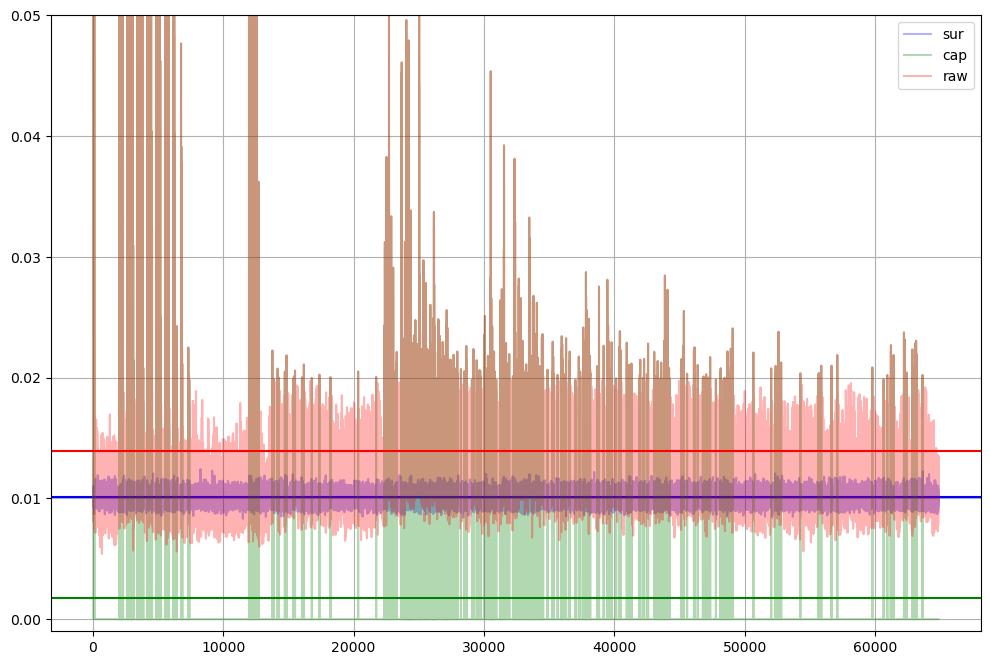

In [17]:
fig,ax = plt.subplots(figsize=(12,8))
stt = 0
end = -1
10300
x=np.arange(len(raw))
alp=0.3

y = sur[stt:end].cpu().numpy()
plt.plot(x[stt:end],y,"b-",alpha=alp,label="sur",)
plt.axhline(np.mean(y),0,40000,c="b")

y = cap[stt:end].cpu().numpy()
plt.plot(x[stt:end],y,"g-",alpha=alp,label="cap")
plt.axhline(np.mean(y),0,40000,c="g")

y = raw[stt:end].cpu().numpy()
plt.plot(x[stt:end],y,"r-",alpha=alp,label="raw")
plt.axhline(np.mean(y),0,40000,c="r")

plt.ylim(-0.001,0.05)
plt.grid(True)
plt.legend()

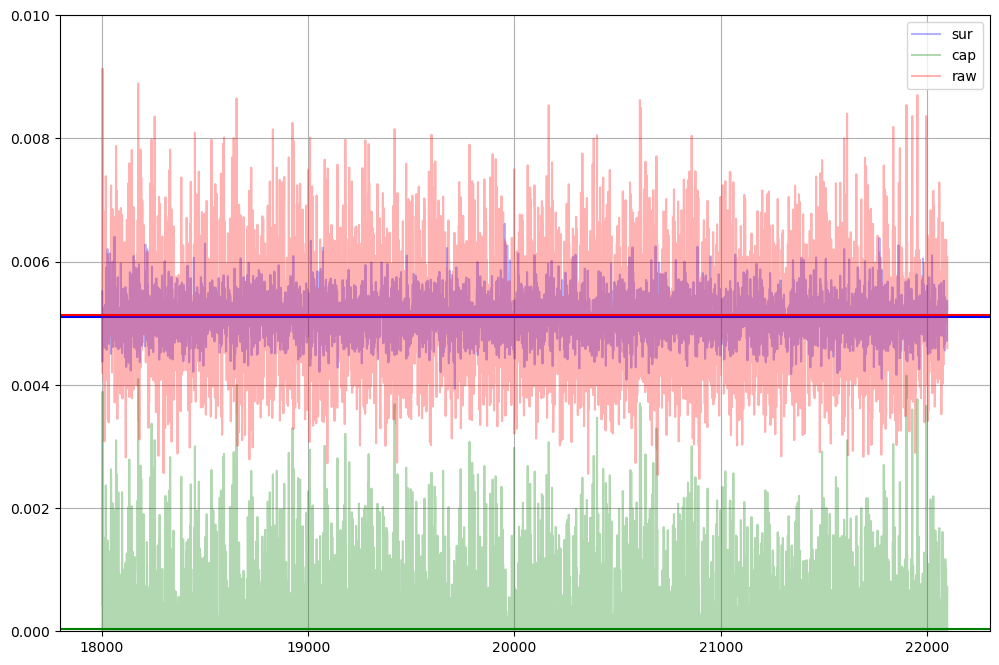

In [51]:
fig,ax = plt.subplots(figsize=(12,8))
stt = 18000
end = -1
10300
x=np.arange(len(cap_3))
alp=0.3

y = sur_3[stt:end].cpu().numpy()
plt.plot(x[stt:end],y,"b-",alpha=alp,label="sur",)
plt.axhline(np.mean(y),0,40000,c="b")

y = cap_3[stt:end].cpu().numpy()
plt.plot(x[stt:end],y,"g-",alpha=alp,label="cap")
plt.axhline(np.mean(y),0,40000,c="g")

y = raw_3[stt:end].cpu().numpy()
plt.plot(x[stt:end],y,"r-",alpha=alp,label="raw")
plt.axhline(np.mean(y),0,40000,c="r")

plt.ylim(0,0.01)
plt.grid(True)
plt.legend()

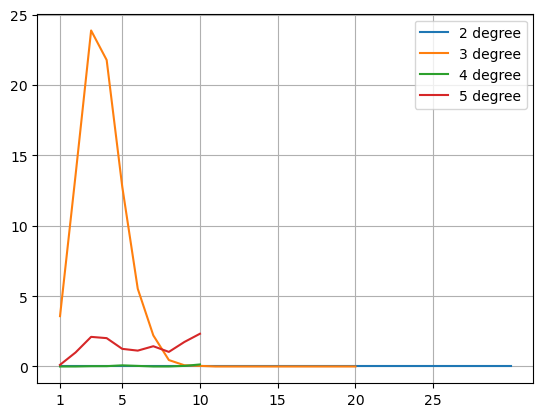

In [7]:
ipc_tau_sum = ESN.ipc_tau(ipc=ipc,mode="sum")
degrees = range(len(ipc_tau_sum))
degrees = [1,2,3,4]
#degrees = [1,3,4]

for deg in degrees:
    plt.plot(np.arange(1,ipc_tau_sum[deg].shape[0]+1),ipc_tau_sum[deg].cpu().numpy(),label=f"{deg+1} degree")
    
    

plt.legend()
plt.xticks([1]+list(np.arange(5,30,5)))
plt.grid()
plt.show()

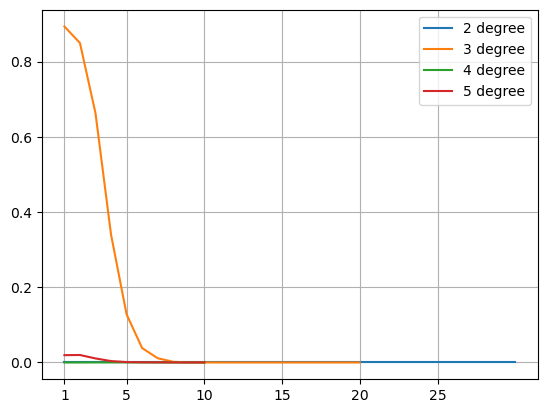

In [8]:
ipc_tau_mean = ESN.ipc_tau(ipc=ipc,mode="mean")
degrees = range(len(ipc_tau_mean))
degrees = [1,2,3,4]
#degrees = [1,3,4]

for deg in degrees:
    plt.plot(np.arange(1,ipc_tau_mean[deg].shape[0]+1),ipc_tau_mean[deg].cpu().numpy(),label=f"{deg+1} degree")
    
    

plt.legend()
plt.xticks([1]+list(np.arange(5,30,5)))
plt.grid()
plt.show()

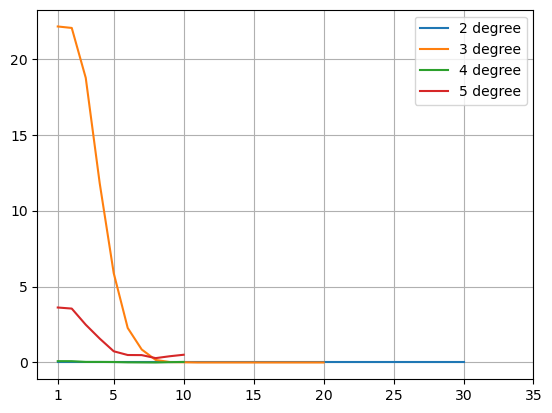

In [9]:
ipc_tau_spread = ESN.ipc_tau_spread(ipc=ipc,mode="sum")


degrees = range(len(ipc_tau_spread))
degrees = [1,2,3,4]
#degrees = [1,3,4]
for deg in degrees:
    plt.plot(np.arange(1,ipc_tau_spread[deg].shape[0]+1),ipc_tau_spread[deg].cpu().numpy(),label=f"{deg+1} degree")
plt.legend()
plt.xticks([1]+list(np.arange(5,40,5)))
plt.grid()
plt.show()

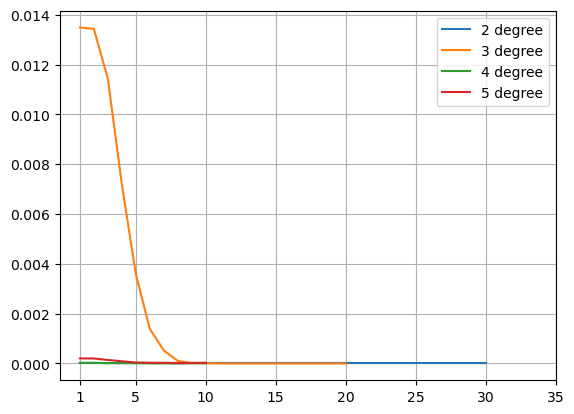

In [10]:
ipc_tau_spread = ESN.ipc_tau_spread(ipc=ipc,mode="mean")


degrees = range(len(ipc_tau_spread))
degrees = [1,2,3,4]
#degrees = [1,3,4]

for deg in degrees:
    plt.plot(np.arange(1,ipc_tau_spread[deg].shape[0]+1),ipc_tau_spread[deg].cpu().numpy(),label=f"{deg+1} degree")
    
    

plt.legend()
plt.xticks([1]+list(np.arange(5,40,5)))
plt.grid()
plt.show()